In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

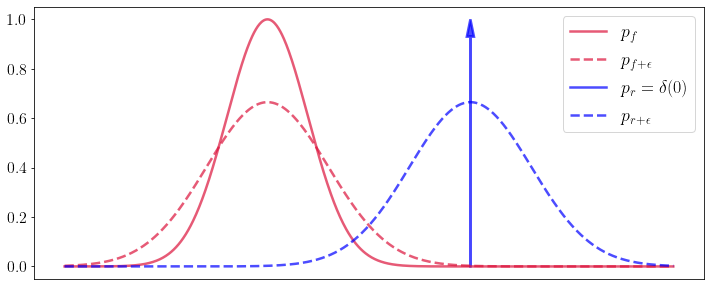

In [22]:
plt.rc('legend', fontsize=18)
plt.rc('ytick', labelsize=16)
plt.rcParams['text.usetex'] = True

# initialize figure
fig, ax = plt.subplots(figsize=(12, 5))

# set parameters
mu_left = -1
biv_mu_left = [-1, 0]
mu_right = 1
biv_mu_right = [1, 0]
sigma = 1 / np.sqrt(2*np.pi)
cov = [[sigma**2, 0], [0, sigma**2]]
sigma_noise = 0.6
cov_noise = [[sigma_noise**2, 0], [0, sigma_noise**2]]

# create the x axis values
x = np.linspace(-3, 3, 1000)

# plot the distributions
lw = 2.5
ax.plot(x, stats.norm.pdf(x, mu_left, sigma), color='crimson', alpha=0.7, lw=lw, label="$p_f$")
ax.plot(x, stats.norm.pdf(x, mu_left, sigma_noise), color='crimson', linestyle='dashed', alpha=0.7, lw=lw, label="$p_{f+\epsilon}$")
arrow = ax.arrow(mu_right, 0, 0, 1, head_width=0.07, head_length=0.07, length_includes_head=True, color='blue', lw=lw, alpha=0.7, label="$p_r=\delta(0)$")
ax.plot(x, stats.norm.pdf(x, mu_right, sigma_noise), color='blue', linestyle='dashed', alpha=0.7, lw=lw, label="$p_{r+\epsilon}$")

# turn of x ticks
ax.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)

# create legend
handles, labels = ax.get_legend_handles_labels()
line = Line2D([0], [0], label="$p_r=\delta(0)$", color='blue', alpha=0.7, lw=lw)
handles.extend([line])
handles[-1], handles[-2] = handles[-2], handles[-1]
labels[-1], labels[-2] = labels[-2], labels[-1]
plt.legend(handles=handles)

#plt.show()
plt.savefig("data_dist.png", dpi=300)

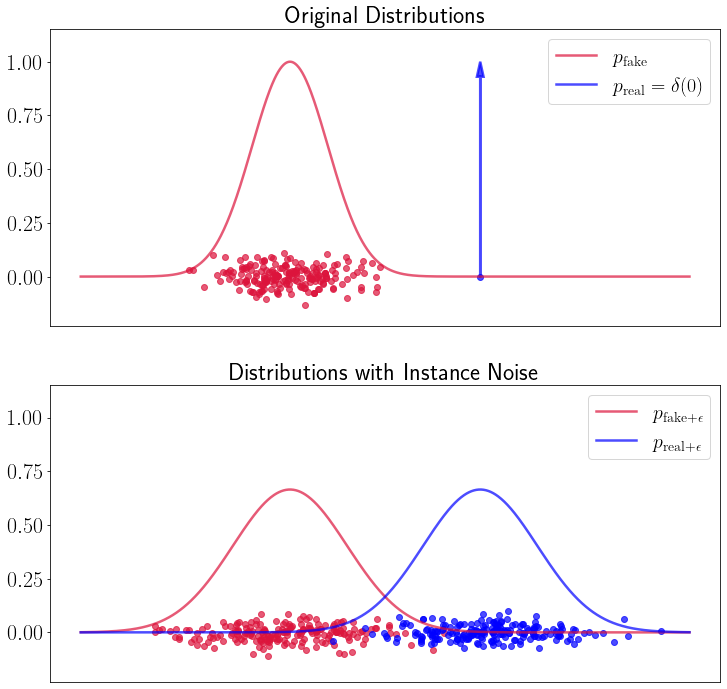

In [8]:
plt.rc('axes', titlesize=24, labelsize=22)
plt.rc('legend', fontsize=20)
plt.rc('ytick', labelsize=22)
plt.rcParams['text.usetex'] = True
np.random.seed(0)

# initialize figure
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax = ax.ravel()

# set parameters
mu_left = -1
biv_mu_left = [-1, 0]
mu_right = 1
biv_mu_right = [1, 0]
sigma = 1 / np.sqrt(2*np.pi)
cov = [[sigma**2, 0], [0, sigma**2]]
sigma_noise = 0.6
cov_noise = [[sigma_noise**2, 0], [0, sigma_noise**2]]

# create the x axis values
x = np.linspace(-3.2, 3.2, 1000)

# plot the distributions
lw = 2.5
ax[0].plot(x, stats.norm.pdf(x, mu_left, sigma), color='crimson', alpha=0.7, lw=lw, label="$p_{\mathrm{fake}}$")
ax[1].plot(x, stats.norm.pdf(x, mu_left, sigma_noise), color='crimson', alpha=0.7, lw=lw, label="$p_{\mathrm{fake}+\epsilon}$")
arrow = ax[0].arrow(mu_right, 0, 0, 1, head_width=0.07, head_length=0.07, length_includes_head=True, color='blue', lw=lw, alpha=0.7, label="$p_{\mathrm{real}}=\delta(0)$")
ax[1].plot(x, stats.norm.pdf(x, mu_right, sigma_noise), color='blue', alpha=0.7, lw=lw, label="$p_{\mathrm{real}+\epsilon}$")

# generate points
s_left = np.random.multivariate_normal(biv_mu_left, cov, 200)
s_left_noise = np.random.multivariate_normal(biv_mu_left, cov_noise, 200)
s_right_noise = np.random.multivariate_normal(biv_mu_right, cov_noise, 200)

# plot the points
ax[0].scatter(s_left[:,0], s_left[:,1]*0.12, color='crimson', alpha=0.7)
ax[1].scatter(s_left_noise[:,0], s_left_noise[:,1]*0.06, color='crimson', alpha=0.7)
ax[0].scatter(mu_right, 0, color='blue', alpha=0.7)
ax[1].scatter(s_right_noise[:,0], s_right_noise[:,1]*0.06, color='blue', alpha=0.7)

# turn off x ticks
for i in range(2):
    ax[i].tick_params(
        axis='x',          
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)
    ax[i].set_ylim(-0.23,1.15)
    
# make titles
ax[0].set_title("Original Distributions")
ax[1].set_title("Distributions with Instance Noise")

# create legends
handles, labels = ax[0].get_legend_handles_labels()
line = Line2D([0], [0], label="$p_{\mathrm{real}}=\delta(0)$", color='blue', alpha=0.7, lw=lw)
handles.extend([line])
ax[0].legend(handles=handles)
ax[1].legend()

# plt.show()
plt.savefig("data_dist_subplot.png", bbox_inches='tight', dpi=300)